# Add to README

* Frauds assumed to be non-authorized transactions.  

# To Discuss with Group

* Time Period Chart made
* Ratio of Frauds throughout the day.
    * Much higher chance at night, suggesting this is when criminals are active, or could even be located elsewhere
* Baseline Model done
* Scaled Data (Robust Scaler)
* do cross_vlidation kfold rather than train test split (speak to omer about this)
https://stackoverflow.com/questions/29082001/how-to-split-a-dataset-into-training-and-validation-set-keeping-ratio-between-cl
* Why we create subsample/over/undersample
* Using interquartile range to delete outliers
https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
* Set thresholds, whereby we are less strict about catching FN if its under a certain amount

# Questions for Omer

* should we resample and then T:t? or just resample on train data?
* t-SNE (dim reduction), can you do it on data that is already PCA?
https://www.youtube.com/watch?v=NEaUSP4YerM
* training vs cross validation sets? whats the difference
* Costs of FP and FN in particular (but also TP and TN)

# Do Not Delete!

In [30]:
# DO NOT REMOVE THESE
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
# DO NOT REMOVE This
%reload_ext autoreload

In [32]:
## DO NOT REMOVE
## import local src module -
## src in this project will contain all your local code
## clean_data.py, model.py, visualize.py, custom.py

#import src.base with alias to avoid namespace clashes

from src import base as fis

In [33]:
fis.test_base()

Base Module Imported

Testing local imports
In clean_data
In Model
In Visualize
In custom module


# Import Libraries

In [34]:
# # For collaborators to install:
# !pip install -r requirements.txt
# # Install pydotaplus
# !pip install pydotplus
# # install pandas profiling
# !pip install pandas-profiling

In [35]:
# Dataframes
import pandas as pd
import numpy as np

# Graphing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Profiling
import pandas_profiling

# Data Preparation
    # Train:Test
from sklearn.model_selection import train_test_split
    # Normalize
from sklearn.preprocessing import normalize
    # Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
    # GridSearch
from sklearn.model_selection import GridSearchCV
    # PCA
from sklearn.decomposition import PCA
    
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from scipy.spatial import distance

# Gaussian Naive Bayes


# KMeans


# Logistic Regression
    # SK-learn
from sklearn.linear_model import LogisticRegression
    # Statsmodel
import statsmodels.api as sm
from patsy import dmatrices

# Random Forest
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier  #Bagging & Random Forest
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
    # Visuals for Random Forest
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# SVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

# Data Importing

In [36]:
csv_name = '../data/raw/creditcard.csv'  #put as a string
df = pd.read_csv(csv_name)

## Data Profile

In [8]:
# df.profile_report()

In [9]:
# # retrieve the list of variables which may need to be rejected, due to high correlation:
# profile = df.profile_report()
# rejected_variables = profile.get_rejected_variables(threshold=0.9)
# rejected_variables

# Data Cleaning

## Transform 'Time' column from seconds into 4 periods of the day

In [37]:
# Cleaned DataFrame
clean_df = pd.read_csv('../data/processed/cleaned_dataframe.csv.gz', compression='gzip')
clean_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V25,V26,V27,V28,Amount,Class,time_of_day_0.0,time_of_day_1.0,time_of_day_2.0,time_of_day_3.0
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0,0,1
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0,0,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0,0,1
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0,0,1
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0,0,1


In [38]:
df['time_of_day'] = 0

In [39]:
secs_per_day = 86400
secs_per_hour = 3600
_1am = 1*secs_per_hour
_7am = 7*secs_per_hour
_1pm = 13*secs_per_hour
_7pm = 19*secs_per_hour

# If its in the 2nd day of data, take off 24 hours
df['Time_1day']=df['Time'].apply(lambda x: x - secs_per_day if x >= secs_per_day else x)

# bin the data into 4 time periods
# 0=1am-7am , 1=7am-1pm, 2=1pm-7pm, 3=7pm-1am
df['time_of_day'][(df['Time_1day']<_1am)] = 3
df['time_of_day'][(df['Time_1day']>=_1am) & (df['time_of_day']<_7am)] = 0
df['time_of_day'][(df['Time_1day']>=_7am) & (df['time_of_day']<_1pm)] = 1
df['time_of_day'][(df['Time_1day']>=_1pm) & (df['time_of_day']<_7pm)] = 2
df['time_of_day'][(df['Time_1day']>=_7pm)] = 3

### Chart to illustrate the time periods

In [48]:
# subplots.  1 = original histogram, 2 = onto 1 day, 3 = big one that shows vertical line divisions of time periods

plt.xlabel('Time in Seconds')
plt.ylabel('Number of Transactions')


layout = go.Layout(
    title=go.layout.Title(
        text='Number of Transactions over Time'
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Time in Seconds'
            )
        )
    ,
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Number of Transactions'
        )
    )


# # original histogram
# plt.title('Number of Transactions over Time')
x = df['Time']
data = [go.Histogram(x=x)]
py.iplot(data=data, layout=layout, filename='Original Time Histogram')


# Aggregated onto 1 day
# x = df['Time_1day']
# data = [go.Histogram(x=x)]
# py.iplot(data, filename='Time aggregated to 1 day Histogram')

# # Division of Time periods 
# x = df['Time_1day']
# data = [go.Histogram(x=x)]
# py.iplot(data, filename='Time Periods Histogram')

SyntaxError: invalid syntax (<ipython-input-48-b41efbaacf9f>, line 26)

#### Customized with Plot.ly Chart Studio

![alt text](../reports/figures/histogram_of_transactions_1_day_time_periods.png "Title")

## Drop duplicate rows

In [13]:
df.drop_duplicates(inplace=True) # 1081 rows dropped

## Is the ratio of Class same throughout day as ratio of total transactions?

In [14]:
# Find the ratio of all the transactions across the 4 time periods
print('The Ratios of All Transactions are:')
for i in list(range(4)):
    total_sum = df['time_of_day'].value_counts().sum()
    ith_ratio = df['time_of_day'].value_counts()[i]
    print('\tTime Period {}:'.format(i), round(ith_ratio/total_sum, 3))

# Find the ratio of the frauds across the 4 time periods
print('The Ratios of Only Frauds are:')
for i in list(range(4)):
    total_sum = df['time_of_day'][df['Class']==1].value_counts().sum()
    ith_ratio = df['time_of_day'][df['Class']==1].value_counts()[i]
    print('\tTime Period {}:'.format(i), round(ith_ratio/total_sum,3))

The Ratios of All Transactions are:
	Time Period 0: 0.071
	Time Period 1: 0.289
	Time Period 2: 0.344
	Time Period 3: 0.295
The Ratios of Only Frauds are:
	Time Period 0: 0.249
	Time Period 1: 0.266
	Time Period 2: 0.304
	Time Period 3: 0.18


* From the differences in the ratios, it seems that fraudsters are active during the european 1am-7am, and then very quiet on the european 7pm-1am

In [15]:
# Frauds per time period as a %
for i in list(range(4)):
    transactions = len(df[df['time_of_day']==i])
    frauds = len(df[(df['time_of_day']==i) & (df['Class']==1)])
    print('Percent of frauds in time period {}:'.format(i), round(frauds/transactions, 5))

Percent of frauds in time period 0: 0.00582
Percent of frauds in time period 1: 0.00154
Percent of frauds in time period 2: 0.00147
Percent of frauds in time period 3: 0.00101


* This shows a much higher percentage of frauds in time period 0, i.e. 1am-7am

## Distribution of Fraud amounts

mean is 123.87186046511626
median is 9.82


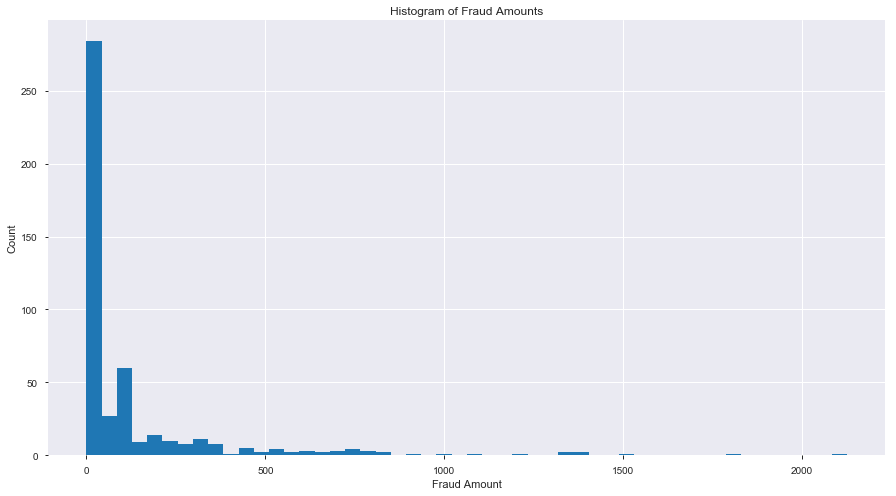

In [26]:
frauds = df['Amount'][df['Class']==1]
plt.figure(figsize=(15,8))
plt.hist(frauds, bins =50)

# Title and axis
plt.title('Histogram of Fraud Amounts')
plt.xlabel('Fraud Amount')
plt.ylabel('Count')

print('mean is {}'.format(frauds.mean()))
print('median is {}'.format(frauds.median()))

mean is 0.0
median is 0.0


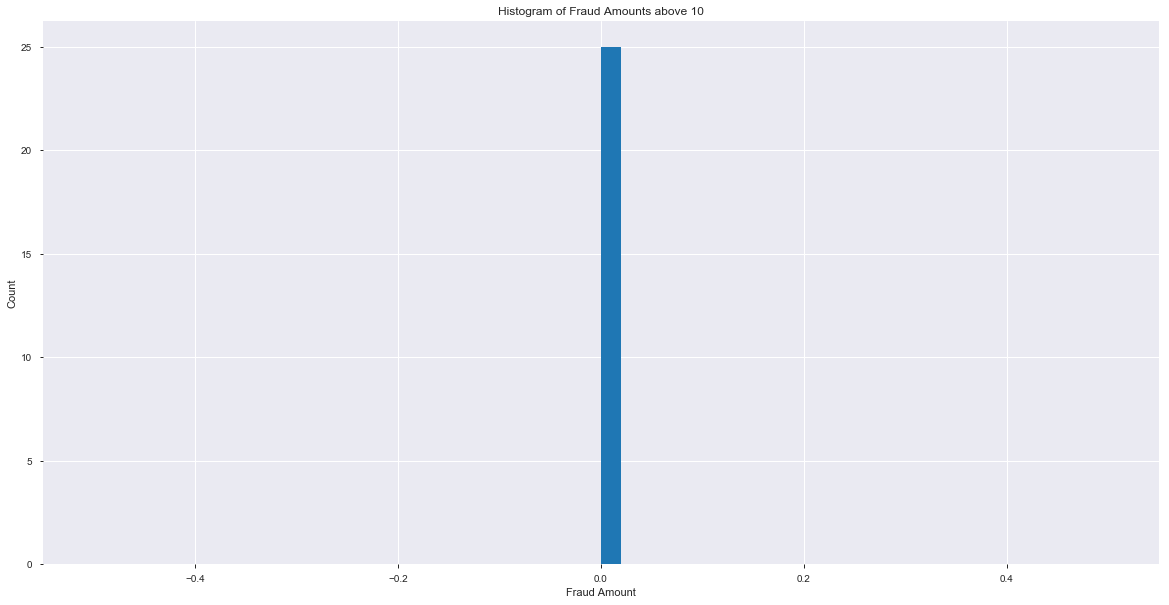

In [29]:
threshold = 10
frauds = df['Amount'][(df['Class']==1) & (df['Amount']==0)]
plt.figure(figsize=(20,10))
plt.hist(frauds, bins=50)

# Title and axis
plt.title('Histogram of Fraud Amounts above {}'.format(threshold))
plt.xlabel('Fraud Amount')
plt.ylabel('Count')

print('mean is {}'.format(frauds.mean()))
print('median is {}'.format(frauds.median()))

## Get Dummies

In [17]:
# Get dummies for the columns we're interested in
df = pd.get_dummies(df, columns=['time_of_day'])

In [18]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V26,V27,V28,Amount,Class,Time_1day,time_of_day_0,time_of_day_1,time_of_day_2,time_of_day_3
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.189115,0.133558,-0.021053,149.62,0,0.0,0,0,0,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.125895,-0.008983,0.014724,2.69,0,0.0,0,0,0,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.139097,-0.055353,-0.059752,378.66,0,1.0,0,0,0,1


## Scale Data

In [19]:
from sklearn.preprocessing import StandardScaler, RobustScaler
# Only need to scale the amount and time columns, rest of data is presumed to be scaled as it has gone through PCA.

# RobustScaler is less prone to outliers.
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

# Use Robust Scaler on amount and time columns
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))  # Is this needed, as we have divided into time periods?

# Drop the original columns, as we no longer need them
df.drop(['Time','Amount'], axis=1, inplace=True)

## Save cleaned dataframe

In [20]:
# # Save our cleaned dataframe to cleaned_dataframe.csv
# df.to_csv('../data/processed/cleaned_dataframe.csv.gz', compression='gzip', index=False)

In [21]:
df_cleaned = pd.read_csv('../data/processed/cleaned_dataframe.csv.gz', compression='gzip')
df_cleaned.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V27,V28,Class,Time_1day,time_of_day_0,time_of_day_1,time_of_day_2,time_of_day_3,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.133558,-0.021053,0,0.0,0,0,0,1,1.774718,-0.995290
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.008983,0.014724,0,0.0,0,0,0,1,-0.268530,-0.995290
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.055353,-0.059752,0,1.0,0,0,0,1,4.959811,-0.995279
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.062723,0.061458,0,1.0,0,0,0,1,1.411487,-0.995279
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.219422,0.215153,0,2.0,0,0,0,1,0.667362,-0.995267


## Train-Test Split

In [36]:
X = df_cleaned.drop('Class', axis=1)
y = df_cleaned['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)  
# stratify maintains the ratio of frauds to non frauds

In [38]:
# Class ratio is even across training and testing sets
print(len(y_train[y_train==1]) / len(y_train))
print(len(y_test[y_test==1]) / len(y_test))

0.0016682801206800945
0.0016635651046072294


In [37]:
print('train size:',len(X_train))
print('test size :',len(X_test))

train size: 212794
test size : 70932


# Data Resampling

## Random Undersampling
* This is when we remove data randomly from the majority class, to get a more balanced dataset.  The purpose is to avoid overfitting.
* Our data is highly skewed and we will balance them with a 50:50 split of fraud to non-fraud

In [40]:
# We have 355 frauds in our train set, so we need to randomly select 355 non-frauds.
train_num_frauds = len(y_train[y_train==1])
train_num_frauds

355

In [ ]:
# Split the X_train into frauds and non-frauds
X_train_class_0 = X_train[X_train==0]
X_train_class_1 = X_train[X_train==1]

# Shuffle the non-fraud dataframe around
X_train_class_0 = X_train_class_0.sample(frac=1) # frac=1 returns the whole dataframe

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

# Data Visualization

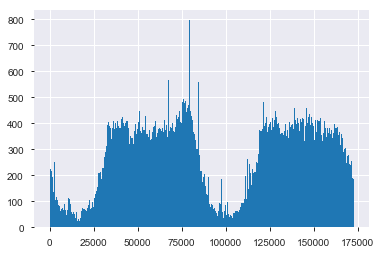

In [30]:
plt.hist(df['Time'], bins=1000);

In [ ]:
seconds_per_hour = 3600
_one_am = 1*seconds_per_hour
_seven_am = 7*seconds_per_hour
_one_pm = 13*seconds_per_hour
_seven_pm = 19*seconds_per_hour

In [ ]:
df[(df['time_of_day'])]

In [ ]:
# Save the model as a png file
png_filename = NONE.png
plt.savefig('../reports/figures/{}'.format(png_filename), bbox_inches='tight')

# Dimensionality Reduction through PCA

In [ ]:
df_pca = df_cleaned.copy()

In [ ]:
# Adam's Code
pca = PCA(n_components=2)  #ncomponents are your number of variables that your trying to keep, they're not your target variables
pca.fit(X)

# Need to scale first

print(pca.components_)
# This tells us the variance explained by each line (keep the greater one)
print(pca.explained_variance_)  #nb that this is the percentage explained of total, they wont add up to 1

# Show the vectors on a scatter plot of the variables
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    # plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

# Using PCA to reduce dimensionality
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
    # visual to show the dimensionality reduction
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

# Baseline Model

The Baseline Model is if we decided to only say the majority of Classes, how well would our model predict frauds?

In [150]:
# Say all transactions are not frauds
num_of_transactions = len(df)
num_of_frauds = len(df[df['Class']==0])
accuracy = round((num_of_frauds/num_of_transactions)*100, 6)
explanation = 'A Baseline Model, where we say all transactions are not fraud, gives us an accuracy of'
print(explanation, '{}%'.format(accuracy))

A Baseline Model, where we say all transactions are not fraud, gives us an accuracy of 99.83329%


As the baseline model has such a high accuracy, we can deduce that accuracy will not be an effective method for evaluating our models.  Instead we have 3 alternatives:

1) Recall

2) F1 Score

3) AUC

# Gaussian Naive Bayes

In [ ]:
df_n_bayes = df_cleaned.copy()

## Gaussian Bayes

In [ ]:
# For continous
df_g_bayes = df_cleaned.copy()

# KNN

In [ ]:
df_knn = df_cleaned.copy()

In [ ]:
# Adam's Code

# Scale first

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Predict and show accuracy
    # make class predictions for the testing set
y_pred_class = knn.predict(X_test)
    # calculate accuracy
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

# F1 score by K values + visualization for k Scores
import matplotlib.pyplot as plt
def f1_by_k_value(X_train, y_train, X_test, y_test, krange_min=1,krange_max=50):
    '''calculate the F1 score by k-value and plot a visualization'''
    # Build list of k-scores
    k_range = list(range(krange_min, krange_max))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_predict = knn.predict(X_test)
        score = metrics.f1_score(y_test, y_predict, average='weighted')
        k_scores.append( score)
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=10)
    plt.title('F1 score by K Value')
    plt.xlabel('K Value')
    plt.ylabel('F1 Score')
    plt.show()

# Get the accuracy
knn = KNN()
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
print("Testing Accuracy: {}%".format(round(accuracy_score(y_test, preds),4)*100))

# K-means

In [ ]:
df_kmeans = df_cleaned.copy()

# Logistic Regression

In [ ]:
df_log_reg = df_cleaned.copy()

In [ ]:
# Adam's code for SKlearn

# Get dummies for the columns we're interested if
x_feats = ['col1', 'col2', 'col3']
X = pd.get_dummies(df[x_feats])
y = df.target
    # Fill null values
X = X.fillna(value=0)
    # Normalize data
for col in X.columns:
    X[col] = (X[col]-min(X[col]))/ (max(X[col]) - min(X[col])) #We subtract the minimum and divide by the range forcing a scale of 0 to 1 for each feature
    # Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    # Fit model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(fit_intercept = False, C = 1e12)
model_log = logreg.fit(X_train, y_train)
model_log
    # Predict
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)
        # Classifier correctness on training data
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))
correct = pd.Series(residuals).value_counts(normalize=True)[0]
print('\nOur model is {}% accurate for our training data'.format(round(correct*100,2)))
        # Classifier correctness on testing data
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts(),'\n')
print(pd.Series(residuals).value_counts(normalize=True))
correct = pd.Series(residuals).value_counts(normalize=True)[0]
print('\nOur model is {}% accurate for our test data'.format(round(correct*100,2)))

In [ ]:
# Adam's Code Statsmodel version

# Define X and Y
y, X = dmatrices('target ~ col1 + C(categorical_col) + col3' ,
                  df, return_type = "dataframe")

# Fit the 1st model
logit_model = sm.Logit(y,X)
result = logit_model.fit()
    # See results of 1st model
model1_summary = result.summary()
model1_summary

# Drop rubbish pvalues
alpha = 0.05
variables_to_keep = []
for X_variable, pvalue in list(zip(X,result.pvalues)):
    if pvalue <= alpha:
        variables_to_keep.append(X_variable)
variables_to_keep  # leaves behind the variables that have p value below the alpha
X = X.drop(columns=variables_to_keep)  # take out the variables

# Fit the 2nd model
logit_model = sm.Logit(y, X)
result = logit_model.fit()
    # see results of 2nd model
model2_summary = result.summary()
model2_summary

# Random Forest

In [ ]:
df_random = df_cleaned.copy()

In [ ]:
# Adam's Code

classifier = DecisionTreeClassifier(random_state=10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is : {}%".format(round(acc, 2)))
    # Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))
    # Create and print a confusion matrix
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

# Train a DT classifier
classifier2 = DecisionTreeClassifier(random_state=10, criterion='entropy')
classifier2.fit(X_train, y_train)
    # Make predictions for test data
y_pred = classifier2.predict(X_test)
    # Calculate Accuracy
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))
    # Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))
    # Create and print a confusion matrix
print('\nConfusion Matrix')
print('----------------')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))


# Function for plotting feature importance
classifier2.feature_importances_ # How much does this feature reduce entropy
    # Function to show importance of each feature
def plot_feature_importances(model):
    '''plots the importance of each feature.  Useful for something like KNN so you can tell which features are useful '''
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(classifier2)
    # confusion matrix print
pred = classifier2.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

# Random Forest in code
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)
forest.score(X_train, y_train) # Accuracy of training data
forest.score(X_test, y_test) # Accuracy of test data
plot_feature_importances(forest) # plot using function above

# Fine Tune the model
forest_2 = RandomForestClassifier(n_estimators = 10, max_features= 2, max_depth= 2)
forest_2.fit(X_train, y_train)
forest_2.score(X_train, y_train) # Accuracy of training data
forest_2.score(X_test, y_test)  # Accuracy of test data

# Use GridsearchCV to find the best Number
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [30, 100, 300], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [2, 4, 6]}
gs = GridSearchCV(forest, param_grid, cv=5)
gs.fit(X_train, y_train)
print('Mean accuracy on the given test data and labels:', gs.score(X_test, y_test))
print('The best parameters are:', gs.best_params_)


## Bagged Trees

# SVM

In [ ]:
# Import csv to df
df = pd.read_csv('filename.csv')
    # Train Test Split
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
    # Print out results
y_pred = svclassifier.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("The accuracy score is {}".format(round(accuracy_score(y_test, y_pred), 4)))

# ROC & AUC
* Evaluate different models to find the one with greatest AUC

In [ ]:
# ROC (TPR vs FPR)
# TPR = TP/(TP+FN)
# FPR = FP/(FP+TN)
# (can swap out FPR for previcion)
# Precision = TP/(TP+FP) = proportion of P that was correctly classified
# precision > FPR if number of N is much greater than number of P (i.e. fraud)
    # This is because precision doesnt include TN, so isnt affected by imbalancef

# Cost-Sensitive (experimenting with it)